# Using the standalone NN interface (without active learning)

This notebook contains a short demonstration on how to use the standalone NN regression interface, which provides a simple scikit-learn style interface to use our NNs without the active learning part. 

We will first change the working directory from the examples subfolder to the main folder, which is required for the imports to work correctly.

In [1]:
import os
os.chdir('..')   # change directory inside the notebook to the main directory

Next, we will create a simple noisy data set to train on, as well as a non-noisy test data set for plotting:

In [2]:
import numpy as np

def f(x):
    return np.exp(0.5*x-0.5) + np.sin(1.5*x)

n_train = 512
np.random.seed(0)

X_train = 2 * np.random.randn(n_train)[:, None]
y_train = f(X_train) + 0.5 * np.random.randn(n_train, 1)

X_test = np.linspace(-6.0, 6.0, 500)[:, None]
y_test = f(X_test)

We can now train a NN regression model in a few seconds using a simple scikit-learn style interface, which already comes with good default parameters and automatic data preprocessing:

In [3]:
from nn_interface import NNRegressor
model = NNRegressor()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

................................................................................................................................................................................................................................................................


In the output above, a dot is printed after each epoch of training. Now, we plot the data, the true function, and the fitted function:

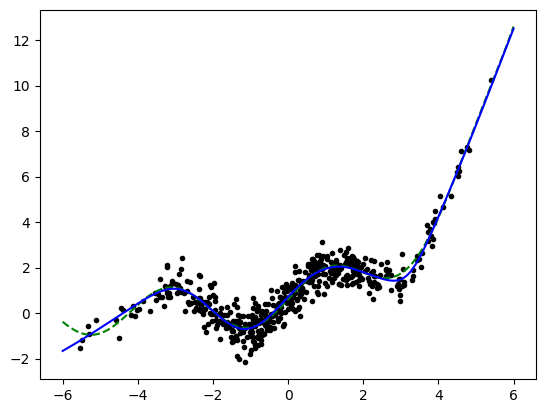

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_train, y_train, 'k.')
plt.plot(X_test, y_test, 'g--')
plt.plot(X_test, y_test_pred, 'b')
plt.show()

While NNRegressor contains good default parameters (those from the paper used for the SiLU activation function), it allows for some customization, which is documented in `nn_interface.py`. For example, it allows to change the number of epochs, allows to train an ensemble of models, and change which fraction of the data is used as validation data for early stopping.